In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
import pandas as pd
from scipy import stats
import itertools

data_dir = path.join("/home/katelyn/Documents/COSC490/Stemming/Data","gov2")
labels = ["paiceHusk", "krovetz", "sStripping", "porter2", "lovins", "wikt", "none"]

MARKERS = ["o","^","s","*","d", "P", "X"]
marker = itertools.cycle(MARKERS)

## Preparing Data

In [4]:
data = pd.read_csv(path.join(data_dir,"map_gov2"), sep="\\s+")
data_avg = data[data["qid"] == "all"]
data = data.drop(data[data["qid"] == "all"].index)
display(data_avg)

,stemmer,qid,map
149,paiceHusk,all,0.2755
299,krovetz,all,0.2917
449,sStripping,all,0.2944
599,porter2,all,0.3036
749,lovins,all,0.2734
899,wikt,all,0.2893
1049,none,all,0.2707


## MAP

<Axes: xlabel='stemmer', ylabel='map'>

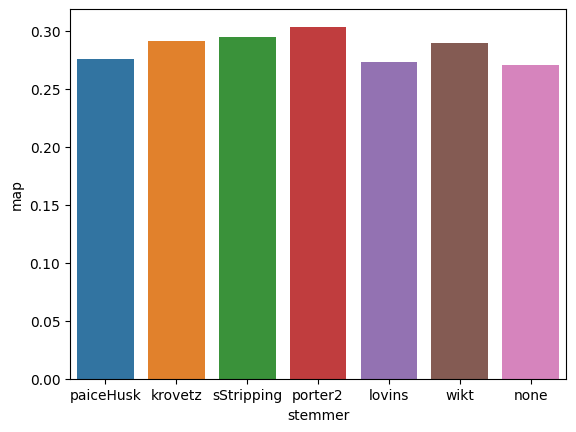

In [5]:
sns.barplot(data=data_avg, x="stemmer", y="map", hue="stemmer")

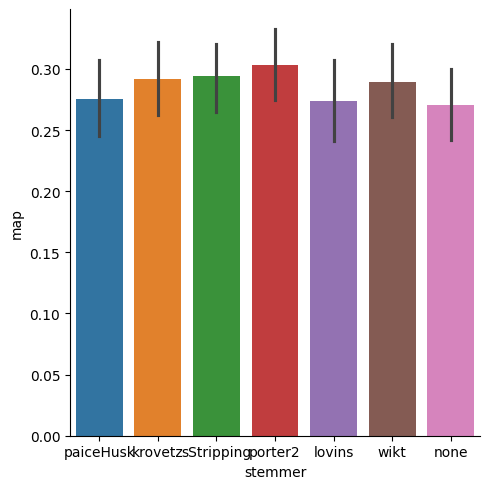

In [6]:
sns.catplot(data=data, kind="bar", x="stemmer", y="map", hue="stemmer")

## Linguistic Accuracy

In [20]:
target = data_avg[data_avg["stemmer"] != "none"]
target = target[target["stemmer"] != "wikt"]
averages = list()
for stemmer in labels[:-2]:
    fmeasures = np.loadtxt(f"/home/katelyn/Documents/COSC490/Stemming/Data/wikt/{stemmer}_cluster_fmeasures.csv")
    averages.append(fmeasures.mean())
target = target.assign(fmeasure=averages)

PearsonRResult(statistic=-0.4395432290531376, pvalue=0.4589386172030575)


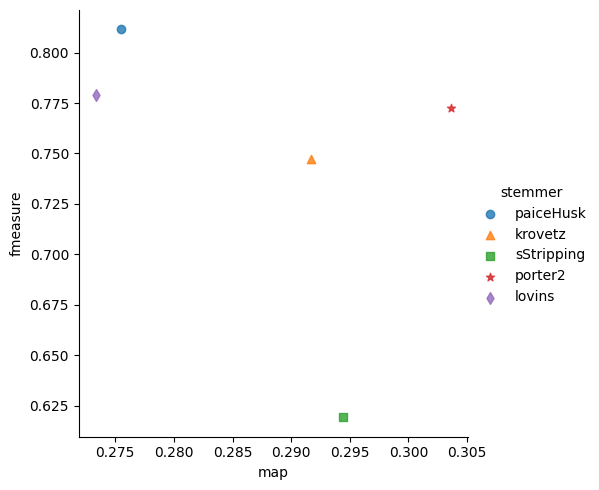

In [21]:
sns.lmplot(target, x="map", y="fmeasure", hue="stemmer", markers=MARKERS[:-2], fit_reg=True)
x = target["map"].to_numpy()
y = target["fmeasure"].to_numpy()
print(f"{stats.pearsonr(x,y)}")

## Statistical Significance

In [7]:
target = data
s = target[target["stemmer"] == "porter2"].loc[:,"map"].tolist()
t = target[target["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,t)}")
print(f"Porter2: {data_avg[data_avg["stemmer"]=="porter2"].loc[:,"map"].tolist()}")
print(f"None: {data_avg[data_avg["stemmer"] == "none"].loc[:,"map"].tolist()}")

TtestResult(statistic=3.9827415832588655, pvalue=0.00010648804679961616, df=148)
Porter2: [0.3036]
None: [0.2707]


In [24]:
target = data
s = target[target["stemmer"] == "porter2"].loc[:,"map"].tolist()
t = target[target["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,t).statistic:.4f} {stats.ttest_rel(s,t).pvalue:.4f}")

3.9827 0.0001


In [25]:
target = data
s = target[target["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
t = target[target["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,t).statistic:.4f} {stats.ttest_rel(s,t).pvalue:.4f}")

0.5356 0.5931


In [26]:
target = data
s = target[target["stemmer"] == "porter2"].loc[:,"map"].tolist()
t = target[target["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,t).statistic:.4f} {stats.ttest_rel(s,t).pvalue:.4f}")

4.1148 0.0001


In [29]:
target = data
s = target[target["stemmer"] == "wikt"].loc[:,"map"].tolist()
t = target[target["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,t).statistic:.4f} {stats.ttest_rel(s,t).pvalue:.4f}")

2.3678 0.0192


## Document Lengths

In [2]:
docLengths = np.loadtxt(path.join(data_dir,"docLengths"))
print(f"Smallest document: {docLengths.min()}")
print(f"Largest document: {docLengths.max()}")
print(f"Average length: {docLengths.mean()}")

Smallest document: 24.0
Largest document: 127182.0
Average length: 1050.4613866063003
